In [23]:
import pandas as pd
import numpy as np
import sys
import os
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

SURVEY_SUMMARY_PATH = r'E:\Met_Council\metc-asim-model\Input\Visualizer\base'
ASIM_OUTPUT = r"E:\Met_Council\metc-asim-model\Base_2018\activitysim\output"
ASIM_CONFIGS_PATH = r'E:\Met_Council\metc-asim-model\source\activitysim\configs'
SURVEY_PATH = r'E:\Met_Council\survey_data\Phase2\TBI_survey_raw'

In [24]:
# Read Survey Data
survey_persons = pd.read_csv(os.path.join(SURVEY_PATH, 'TBI21_PERSON_RAW_202308281334.csv'), low_memory=False)
# if it's missing, make it no
survey_persons.loc[survey_persons['work_offers_transit'] > 1, 'work_offers_transit'] = 0
survey_persons.loc[survey_persons['work_uses_transit'] > 1, 'work_uses_transit'] = 0
observed = survey_persons[survey_persons['employment_status'] <= 3].groupby(['work_uses_transit']).agg(observed = ('person_weight', 'sum')) #.to_csv('stats.csv')

In [25]:
# Read Model Data
model_persons = pd.read_csv(os.path.join(ASIM_OUTPUT, 'final_persons.csv'), low_memory=False)
compare_table = model_persons.groupby('transit_pass_ownership').agg(modeled = ('person_id', 'count')).join(observed)
compare_table['pct_observed'] = compare_table['observed'] / compare_table['observed'].sum()
compare_table['pct_modeled'] = compare_table['modeled'] / compare_table['modeled'].sum()

In [26]:
compare_table

,modeled,observed,pct_observed,pct_modeled
transit_pass_ownership,,,,
0,732818,1.935193e+06,0.975331,0.961494
1,29348,4.894704e+04,0.024669,0.038506


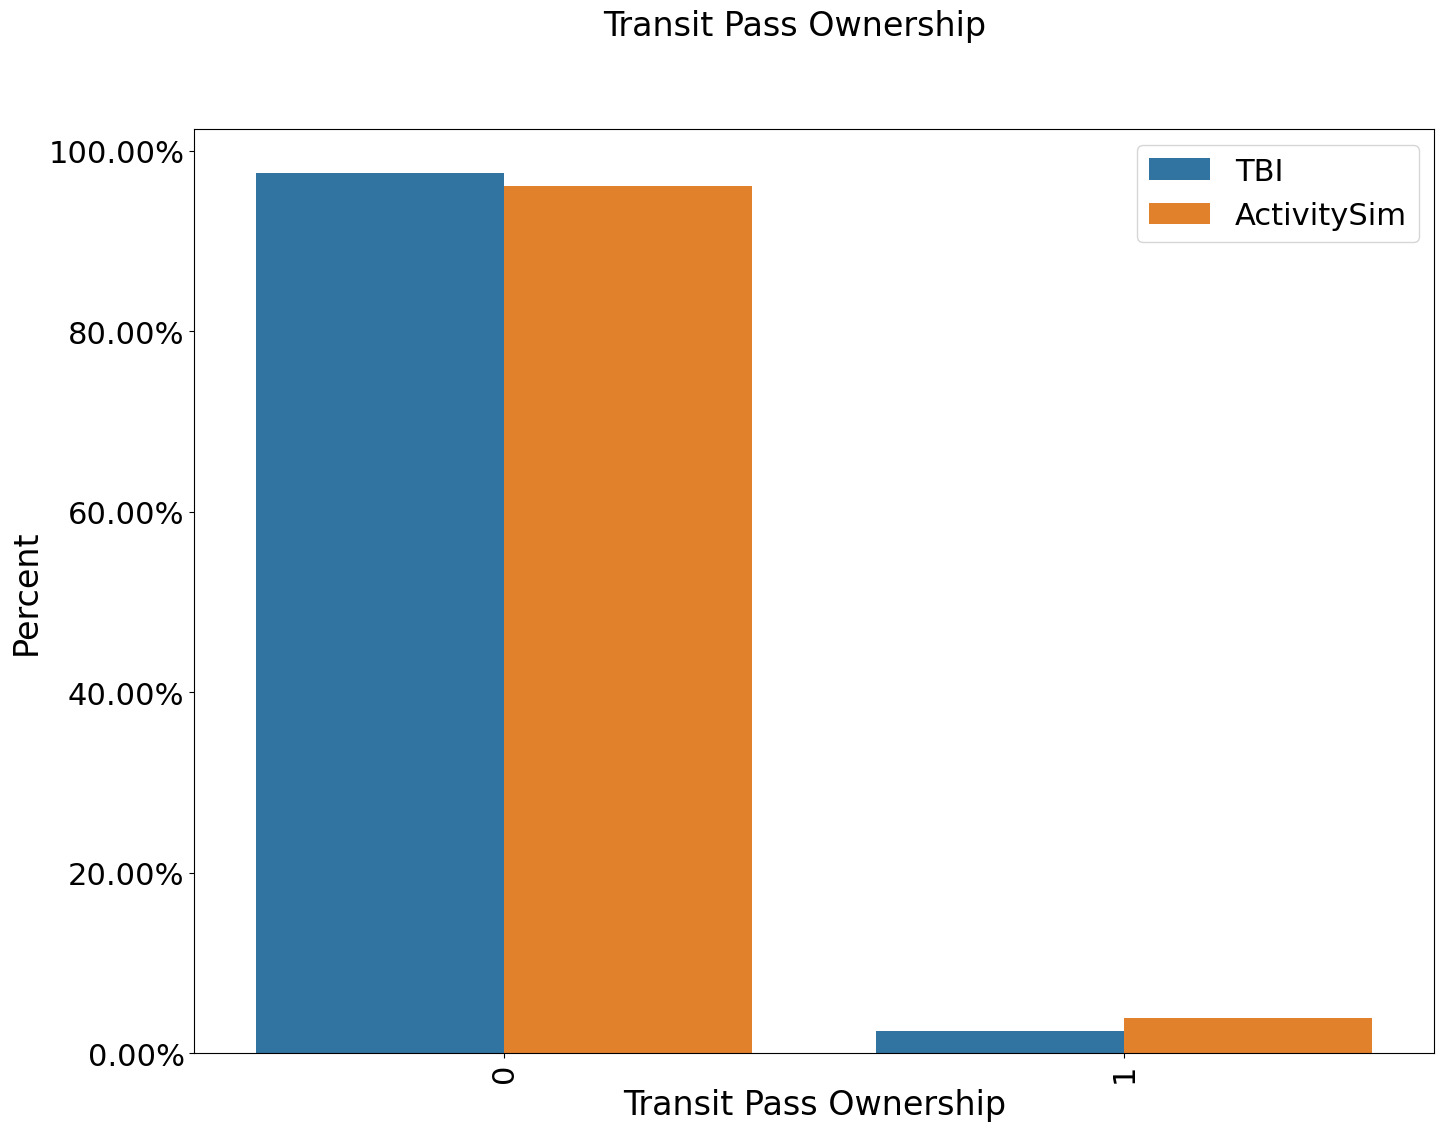

In [27]:
plot_data = compare_table.reset_index().melt(id_vars = 'transit_pass_ownership', value_vars = ['pct_observed', 'pct_modeled'])
plot_data.loc[plot_data['variable'] == 'pct_observed', 'variable'] = 'TBI'
plot_data.loc[plot_data['variable'] == 'pct_modeled', 'variable'] = 'ActivitySim'
fig, ax = plt.subplots(figsize=(16, 12))
fig.suptitle(f"Transit Pass Ownership", fontsize=24)
sns.barplot(data=plot_data, x='transit_pass_ownership', y='value', hue='variable')
plt.legend(fontsize=22)
plt.xticks(rotation=90, fontsize=22)
plt.yticks(fontsize=22)
plt.ylabel('Percent', fontsize=24)
plt.xlabel('Transit Pass Ownership', fontsize=24)
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:.2%}'))